In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [3]:
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"

model = hub.load(model_url)

In [4]:
import numpy as np
from PIL import Image

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

In [5]:
image_np = load_image_into_numpy_array("test1.jpg")

In [6]:
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

In [7]:
detections = model(input_tensor)

In [8]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

In [9]:
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
import matplotlib.pyplot as plt

In [10]:
category_index = {1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitcase'},
 34: {'id': 34, 'name': 'frisbee'},
 35: {'id': 35, 'name': 'skis'},
 36: {'id': 36, 'name': 'snowboard'},
 37: {'id': 37, 'name': 'sports ball'},
 38: {'id': 38, 'name': 'kite'},
 39: {'id': 39, 'name': 'baseball bat'},
 40: {'id': 40, 'name': 'baseball glove'},
 41: {'id': 41, 'name': 'skateboard'},
 42: {'id': 42, 'name': 'surfboard'},
 43: {'id': 43, 'name': 'tennis racket'},
 44: {'id': 44, 'name': 'bottle'},
 46: {'id': 46, 'name': 'wine glass'},
 47: {'id': 47, 'name': 'cup'},
 48: {'id': 48, 'name': 'fork'},
 49: {'id': 49, 'name': 'knife'},
 50: {'id': 50, 'name': 'spoon'},
 51: {'id': 51, 'name': 'bowl'},
 52: {'id': 52, 'name': 'banana'},
 53: {'id': 53, 'name': 'apple'},
 54: {'id': 54, 'name': 'sandwich'},
 55: {'id': 55, 'name': 'orange'},
 56: {'id': 56, 'name': 'broccoli'},
 57: {'id': 57, 'name': 'carrot'},
 58: {'id': 58, 'name': 'hot dog'},
 59: {'id': 59, 'name': 'pizza'},
 60: {'id': 60, 'name': 'donut'},
 61: {'id': 61, 'name': 'cake'},
 62: {'id': 62, 'name': 'chair'},
 63: {'id': 63, 'name': 'couch'},
 64: {'id': 64, 'name': 'potted plant'},
 65: {'id': 65, 'name': 'bed'},
 67: {'id': 67, 'name': 'dining table'},
 70: {'id': 70, 'name': 'toilet'},
 72: {'id': 72, 'name': 'tv'},
 73: {'id': 73, 'name': 'laptop'},
 74: {'id': 74, 'name': 'mouse'},
 75: {'id': 75, 'name': 'remote'},
 76: {'id': 76, 'name': 'keyboard'},
 77: {'id': 77, 'name': 'cell phone'},
 78: {'id': 78, 'name': 'microwave'},
 79: {'id': 79, 'name': 'oven'},
 80: {'id': 80, 'name': 'toaster'},
 81: {'id': 81, 'name': 'sink'},
 82: {'id': 82, 'name': 'refrigerator'},
 84: {'id': 84, 'name': 'book'},
 85: {'id': 85, 'name': 'clock'},
 86: {'id': 86, 'name': 'vase'},
 87: {'id': 87, 'name': 'scissors'},
 88: {'id': 88, 'name': 'teddy bear'},
 89: {'id': 89, 'name': 'hair drier'},
 90: {'id': 90, 'name': 'toothbrush'}}

In [11]:
detections['detection_boxes'].shape

(100, 4)

In [12]:
image_np_with_detections = image_np.copy()

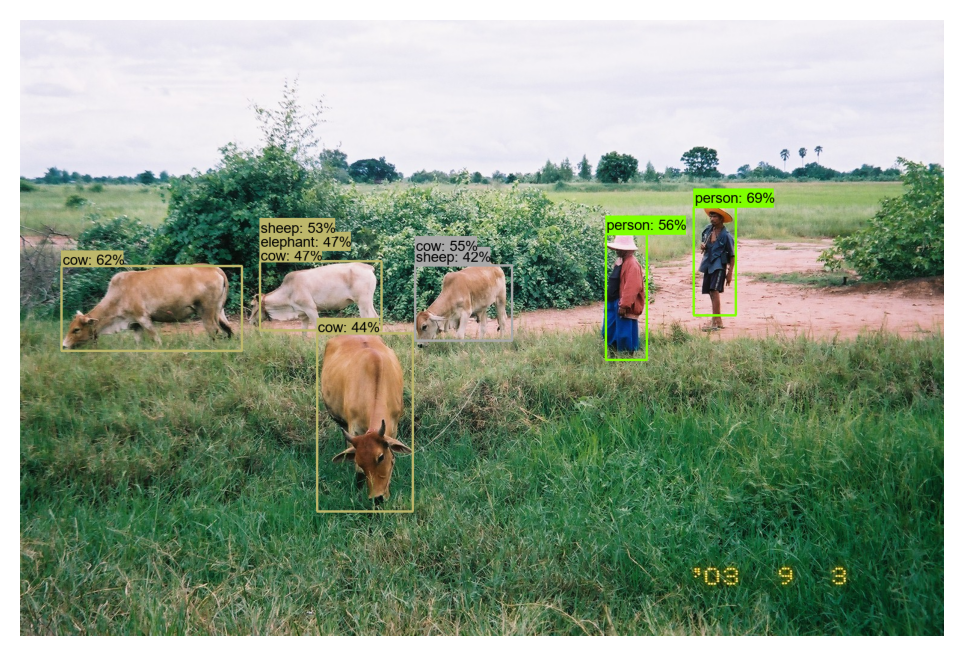

<Figure size 640x480 with 0 Axes>

In [13]:
IMAGE_SIZE = (6, 4)
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()
plt.savefig("padded_image2.png", bbox_inches="tight", pad_inches=0, dpi=200)

In [14]:
print(detections['detection_scores'].shape)
print(detections['detection_multiclass_scores'].shape)
print(detections['raw_detection_scores'].shape)
print(detections['detection_anchor_indices'].shape)
print(detections['detection_boxes'].shape)
print(detections['raw_detection_boxes'].shape)
print(detections['detection_classes'].shape)
print(detections['num_detections'])

(100,)
(100, 91)
(100, 91)
(100,)
(100, 4)
(100, 4)
(100,)
100


In [15]:
detections['detection_boxes']

array([[0.30374923, 0.7290215 , 0.47867116, 0.77484757],
       [0.39977407, 0.04465903, 0.536812  , 0.24037784],
       [0.34809154, 0.63373274, 0.55163366, 0.6785868 ],
       [0.3992179 , 0.42718238, 0.5195903 , 0.5330881 ],
       [0.39216912, 0.25920683, 0.5031528 , 0.39130443],
       [0.39216912, 0.25920683, 0.5031528 , 0.39130443],
       [0.39216912, 0.25920683, 0.5031528 , 0.39130443],
       [0.50901824, 0.32116097, 0.7970634 , 0.42539954],
       [0.3992179 , 0.42718238, 0.5195903 , 0.5330881 ],
       [0.3992179 , 0.42718238, 0.5195903 , 0.5330881 ],
       [0.5015763 , 0.30842805, 0.79454803, 0.42354798],
       [0.3745812 , 0.0558497 , 0.5379885 , 0.70464957],
       [0.50901824, 0.32116097, 0.7970634 , 0.42539954],
       [0.3992179 , 0.42718238, 0.5195903 , 0.5330881 ],
       [0.29258072, 0.72221315, 0.52405953, 0.78743756],
       [0.49841243, 0.29968357, 0.7818288 , 0.4237088 ],
       [0.50901824, 0.32116097, 0.7970634 , 0.42539954],
       [0.3992179 , 0.42718238,

In [16]:
detections['detection_scores']

array([0.6923457 , 0.6250699 , 0.5614448 , 0.5533197 , 0.53022987,
       0.4741873 , 0.4741735 , 0.44791186, 0.42190105, 0.38579962,
       0.34905717, 0.34453678, 0.3392286 , 0.33693406, 0.33405244,
       0.32801804, 0.32371533, 0.31765205, 0.31236538, 0.3006056 ,
       0.29238468, 0.29092795, 0.27864483, 0.27656457, 0.2751799 ,
       0.26991442, 0.26920643, 0.26635793, 0.26179755, 0.25683653,
       0.24730963, 0.24696015, 0.24359174, 0.24060465, 0.23653519,
       0.23393506, 0.23241967, 0.22572312, 0.2250492 , 0.2214945 ,
       0.21902014, 0.21166676, 0.20882535, 0.20724776, 0.20679508,
       0.20481138, 0.20470421, 0.2045508 , 0.20433466, 0.20357709,
       0.20121351, 0.20024242, 0.19915482, 0.19814833, 0.19656873,
       0.19314425, 0.19311717, 0.19148317, 0.1894162 , 0.18811662,
       0.18726929, 0.18481195, 0.1826131 , 0.18233836, 0.17904396,
       0.17625608, 0.17573036, 0.17517532, 0.17505859, 0.17442669,
       0.17429906, 0.17403091, 0.17166343, 0.171653  , 0.17092

In [17]:
detections


{'detection_scores': array([0.6923457 , 0.6250699 , 0.5614448 , 0.5533197 , 0.53022987,
        0.4741873 , 0.4741735 , 0.44791186, 0.42190105, 0.38579962,
        0.34905717, 0.34453678, 0.3392286 , 0.33693406, 0.33405244,
        0.32801804, 0.32371533, 0.31765205, 0.31236538, 0.3006056 ,
        0.29238468, 0.29092795, 0.27864483, 0.27656457, 0.2751799 ,
        0.26991442, 0.26920643, 0.26635793, 0.26179755, 0.25683653,
        0.24730963, 0.24696015, 0.24359174, 0.24060465, 0.23653519,
        0.23393506, 0.23241967, 0.22572312, 0.2250492 , 0.2214945 ,
        0.21902014, 0.21166676, 0.20882535, 0.20724776, 0.20679508,
        0.20481138, 0.20470421, 0.2045508 , 0.20433466, 0.20357709,
        0.20121351, 0.20024242, 0.19915482, 0.19814833, 0.19656873,
        0.19314425, 0.19311717, 0.19148317, 0.1894162 , 0.18811662,
        0.18726929, 0.18481195, 0.1826131 , 0.18233836, 0.17904396,
        0.17625608, 0.17573036, 0.17517532, 0.17505859, 0.17442669,
        0.17429906, 0.174030